In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#

In [4]:
from scipy import stats

In [5]:
#Helper Function
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [6]:
list_of_76_Genes = sorted(list(pd.read_csv('C:\\Users\\parig\\OneDrive\\Desktop\\IISC\\p2\\New folder\\76GS_Genes_Original.txt', sep = '\t').T.loc['Gene',:]))
list_of_76_Genes

['ANKRD22',
 'ANTXR2',
 'AP1M2',
 'AXL',
 'BSPRY',
 'C1ORF116',
 'C1ORF172',
 'C3ORF21',
 'CARD6',
 'CDH1',
 'CDH3',
 'CDS1',
 'CLDN4',
 'CLDN7',
 'CRB3',
 'DSP',
 'ELMO3',
 'ENPP5',
 'EPB41L5',
 'EPHA1',
 'EPN3',
 'EPPK1',
 'ERBB3',
 'EVPL',
 'F11R',
 'FN1',
 'FXYD3',
 'GALNT3',
 'GALNT5',
 'GPR110',
 'GPR56',
 'GRHL1',
 'GRHL2',
 'HNMT',
 'INADL',
 'ITGB6',
 'KLC3',
 'KRT19',
 'KRTCAP3',
 'LIX1L',
 'LRRC54',
 'MAL2',
 'MAPK13',
 'MMP2',
 'MPP7',
 'MPZL2',
 'MTAC2D1',
 'MUC1',
 'NRP1',
 'PPARG',
 'PRR5',
 'PRSS22',
 'PRSS8',
 'RAB25',
 'RBM35A',
 'RBPMS',
 'S100A14',
 'SCNN1A',
 'SERINC2',
 'SH3YL1',
 'SHROOM3',
 'SPINT2',
 'SSH3',
 'ST14',
 'STAP2',
 'TACSTD1',
 'TACSTD2',
 'TGFBI',
 'TJP3',
 'TMC4',
 'TMEM125',
 'TMEM30B',
 'TMEM45B',
 'TNFRSF21',
 'VIM',
 'ZEB1']

In [53]:
data = pd.read_csv("C:\\Users\\parig\\Downloads\\TCGA-BRCA.htseq_fpkm.tsv\\TCGA-BRCA.htseq_fpkm.tsv", sep='\t')
data

,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,ENSG00000105063.17,3.680055,3.969785,3.011921,4.059347,4.249147,3.935869,4.082827,3.931459,3.870035,...,3.348868,3.650676,4.478325,3.520017,3.372176,3.772585,3.133380,4.186347,3.340223,3.966532
60479,ENSG00000231119.2,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248
60480,ENSG00000280861.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60481,ENSG00000123685.7,0.599579,1.382192,0.629043,0.396315,0.157504,0.662529,0.174878,1.724989,0.580636,...,0.487383,0.491877,1.261285,0.407713,0.379536,0.551165,0.611319,0.706170,0.683710,0.430933


In [8]:
a=data["Ensembl_ID"]
a

0         ENSG00000242268.2
1         ENSG00000270112.3
2        ENSG00000167578.15
3         ENSG00000273842.1
4         ENSG00000078237.5
                ...        
60478    ENSG00000105063.17
60479     ENSG00000231119.2
60480     ENSG00000280861.1
60481     ENSG00000123685.7
60482     ENSG00000181518.3
Name: Ensembl_ID, Length: 60483, dtype: object

In [9]:
a.to_csv("ensemble id.csv")

In [54]:
ss=pd.read_csv("C:\\Users\\parig\\ensemble id.csv")
ss
data['Ensembl_ID']=ss['Ensembl_ID']
data


,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,ENSG00000105063,3.680055,3.969785,3.011921,4.059347,4.249147,3.935869,4.082827,3.931459,3.870035,...,3.348868,3.650676,4.478325,3.520017,3.372176,3.772585,3.133380,4.186347,3.340223,3.966532
60479,ENSG00000231119,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248
60480,ENSG00000280861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60481,ENSG00000123685,0.599579,1.382192,0.629043,0.396315,0.157504,0.662529,0.174878,1.724989,0.580636,...,0.487383,0.491877,1.261285,0.407713,0.379536,0.551165,0.611319,0.706170,0.683710,0.430933


In [55]:
gene=pd.read_csv("C:\\Users\\parig\\OneDrive\\Desktop\\IISC\\gene2.csv")


gene

,Ensembl_ID,gene
0,ENSG00000242268,LINC02082
1,ENSG00000270112,AC090241.2
2,ENSG00000167578,RAB4B
3,ENSG00000273842,NaN
4,ENSG00000078237,TIGAR
...,...,...
60478,ENSG00000105063,PPP6R1
60479,ENSG00000231119,AL031666.1
60480,ENSG00000280861,NaN
60481,ENSG00000123685,BATF3


In [39]:
new_data= pd.merge(data, gene, how='inner')
new_data

ValueError: 'Ensembl_ID' is both an index level and a column label, which is ambiguous.

In [13]:
genes_in_dataset=new_data.iloc[:,1218:1219]
genes_in_dataset

,gene
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
120961,PPP6R1
120962,AL031666.1
120963,NaN
120964,BATF3


In [14]:
common_genes = intersection(list_of_76_Genes, genes_in_dataset)
len(common_genes)

0

In [56]:
lists=sorted(list(pd.read_csv('C:\\Users\\parig\\OneDrive\\Desktop\\IISC\\project e\\76gs in EnsembleID.txt', sep = '\t').T.loc['To',:]))
lists

['ENSG00000005001',
 'ENSG00000026025',
 'ENSG00000035115',
 'ENSG00000039068',
 'ENSG00000049283',
 'ENSG00000052344',
 'ENSG00000062038',
 'ENSG00000065361',
 'ENSG00000083307',
 'ENSG00000087245',
 'ENSG00000089356',
 'ENSG00000096696',
 'ENSG00000099250',
 'ENSG00000102890',
 'ENSG00000104892',
 'ENSG00000105289',
 'ENSG00000111319',
 'ENSG00000112796',
 'ENSG00000115109',
 'ENSG00000115221',
 'ENSG00000115339',
 'ENSG00000115414',
 'ENSG00000119411',
 'ENSG00000120708',
 'ENSG00000129354',
 'ENSG00000130545',
 'ENSG00000132170',
 'ENSG00000132357',
 'ENSG00000132698',
 'ENSG00000134317',
 'ENSG00000136542',
 'ENSG00000138771',
 'ENSG00000146072',
 'ENSG00000146904',
 'ENSG00000147676',
 'ENSG00000148516',
 'ENSG00000149418',
 'ENSG00000149573',
 'ENSG00000150054',
 'ENSG00000150540',
 'ENSG00000151715',
 'ENSG00000152766',
 'ENSG00000156711',
 'ENSG00000157110',
 'ENSG00000157992',
 'ENSG00000158769',
 'ENSG00000163297',
 'ENSG00000163624',
 'ENSG00000167601',
 'ENSG00000167608',


In [57]:
genes_in_dataset = data.loc[:,'Ensembl_ID']
genes_in_dataset

0        ENSG00000242268
1        ENSG00000270112
2        ENSG00000167578
3        ENSG00000273842
4        ENSG00000078237
              ...       
60478    ENSG00000105063
60479    ENSG00000231119
60480    ENSG00000280861
60481    ENSG00000123685
60482    ENSG00000181518
Name: Ensembl_ID, Length: 60483, dtype: object

In [58]:
common_genes = intersection(lists, genes_in_dataset)
len(common_genes)

67

In [59]:
data.set_index('Ensembl_ID',inplace=True)

In [60]:
common_genes

['ENSG00000182795',
 'ENSG00000099250',
 'ENSG00000178078',
 'ENSG00000152766',
 'ENSG00000065361',
 'ENSG00000146072',
 'ENSG00000115221',
 'ENSG00000167601',
 'ENSG00000151715',
 'ENSG00000261150',
 'ENSG00000172830',
 'ENSG00000147676',
 'ENSG00000156711',
 'ENSG00000167880',
 'ENSG00000148516',
 'ENSG00000005001',
 'ENSG00000186654',
 'ENSG00000171345',
 'ENSG00000112796',
 'ENSG00000167642',
 'ENSG00000129354',
 'ENSG00000062038',
 'ENSG00000163297',
 'ENSG00000149418',
 'ENSG00000271601',
 'ENSG00000158769',
 'ENSG00000115339',
 'ENSG00000167608',
 'ENSG00000132170',
 'ENSG00000115109',
 'ENSG00000179178',
 'ENSG00000132357',
 'ENSG00000111319',
 'ENSG00000083307',
 'ENSG00000150540',
 'ENSG00000163624',
 'ENSG00000149573',
 'ENSG00000189143',
 'ENSG00000157110',
 'ENSG00000039068',
 'ENSG00000105289',
 'ENSG00000182107',
 'ENSG00000120708',
 'ENSG00000134317',
 'ENSG00000049283',
 'ENSG00000184292',
 'ENSG00000138771',
 'ENSG00000035115',
 'ENSG00000146904',
 'ENSG00000104892',


In [61]:
df = pd.DataFrame(common_genes, columns=['Ensembl_ID'])
df

,Ensembl_ID
0,ENSG00000182795
1,ENSG00000099250
2,ENSG00000178078
3,ENSG00000152766
4,ENSG00000065361
...,...
62,ENSG00000132698
63,ENSG00000102890
64,ENSG00000087245
65,ENSG00000089356


In [62]:
filtered_dataframe = pd.merge(df, data, on='Ensembl_ID', how='inner')

In [63]:
weights_table = pd.DataFrame([[0]*len(common_genes)])
weights_table

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
filtered_dataframe.set_index('Ensembl_ID',inplace=True)

In [65]:
weights_table.columns = filtered_dataframe.index
weights_table

Ensembl_ID,ENSG00000182795,ENSG00000099250,ENSG00000178078,ENSG00000152766,ENSG00000065361,ENSG00000146072,ENSG00000115221,ENSG00000167601,ENSG00000151715,ENSG00000261150,...,ENSG00000130545,ENSG00000115414,ENSG00000185499,ENSG00000168528,ENSG00000026025,ENSG00000132698,ENSG00000102890,ENSG00000087245,ENSG00000089356,ENSG00000096696
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
for i in filtered_dataframe.index:
    if i !='ENSG00000039068':
        weights_table.loc[0,i]= stats.pearsonr(    filtered_dataframe.loc['ENSG00000039068',], filtered_dataframe.loc[i,]   )[0]
        #print(weights)
    elif i == 'ENSG00000039068':
        weights_table.loc[0,i]=0

In [67]:
weights_table

Ensembl_ID,ENSG00000182795,ENSG00000099250,ENSG00000178078,ENSG00000152766,ENSG00000065361,ENSG00000146072,ENSG00000115221,ENSG00000167601,ENSG00000151715,ENSG00000261150,...,ENSG00000130545,ENSG00000115414,ENSG00000185499,ENSG00000168528,ENSG00000026025,ENSG00000132698,ENSG00000102890,ENSG00000087245,ENSG00000089356,ENSG00000096696
0,-0.006708,-0.186763,0.120034,0.140797,0.335014,-0.098668,0.177266,-0.128038,0.136591,0.159705,...,0.245591,0.06179,0.048201,0.294314,-0.314328,0.240302,0.35113,-0.217931,0.271326,0.224261


In [68]:
GS76_score =  filtered_dataframe.T @ weights_table.T
#Centering
GS76_Centered = (GS76_score - GS76_score.mean()).T

In [69]:
for i in data.columns:
    data.loc['76GS_Score',i] = GS76_Centered.loc[0,i]

In [70]:
print(GS76_Centered.columns)



Index(['TCGA-E9-A1NI-01A', 'TCGA-A1-A0SP-01A', 'TCGA-BH-A1EU-11A',
       'TCGA-A8-A06X-01A', 'TCGA-E2-A14T-01A', 'TCGA-AC-A8OS-01A',
       'TCGA-A8-A09K-01A', 'TCGA-OL-A5RY-01A', 'TCGA-BH-A0DG-01A',
       'TCGA-B6-A0I9-01A',
       ...
       'TCGA-BH-A0DT-11A', 'TCGA-E9-A1R0-01A', 'TCGA-BH-A0B6-01A',
       'TCGA-B6-A0RN-01A', 'TCGA-A8-A09W-01A', 'TCGA-EW-A1P3-01A',
       'TCGA-A7-A13F-11A', 'TCGA-A2-A0T6-01A', 'TCGA-A7-A5ZW-01A',
       'TCGA-BH-A203-01A'],
      dtype='object', length=1217)


In [71]:
data

,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-B6-A0I9-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,0.029266,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
ENSG00000270112,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,0.028433,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
ENSG00000167578,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,2.240375,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000078237,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,1.919117,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000231119,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,0.164329,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248
ENSG00000280861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000123685,0.599579,1.382192,0.629043,0.396315,0.157504,0.662529,0.174878,1.724989,0.580636,0.372911,...,0.487383,0.491877,1.261285,0.407713,0.379536,0.551165,0.611319,0.706170,0.683710,0.430933


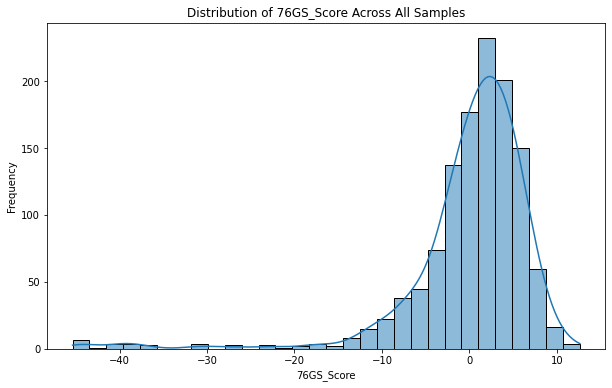

In [72]:
scores = data.loc['76GS_Score']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=30, kde=True)
plt.title('Distribution of 76GS_Score Across All Samples')
plt.xlabel('76GS_Score')
plt.ylabel('Frequency')
plt.show()

In [76]:

oo=data.loc[:, (data.loc['76GS_Score'] >= -2.5) & (data.loc['76GS_Score']<= 2.5)]

In [77]:
oo

,TCGA-A1-A0SP-01A,TCGA-AC-A8OS-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-A2-A0CP-01A,TCGA-AR-A1AU-01A,TCGA-A8-A07R-01A,TCGA-AO-A12C-01A,TCGA-A2-A1FZ-01A,TCGA-BH-A18T-01A,...,TCGA-AC-A2BM-01A,TCGA-BH-A1F8-01A,TCGA-E9-A1RA-01A,TCGA-A8-A0A6-01A,TCGA-C8-A27B-01A,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268,0.000000,0.354334,0.000000,0.000000,0.107505,0.034393,0.000000,0.000000,0.193303,0.000000,...,0.000000,0.000000,0.044571,0.000000,0.000000,0.030427,0.234169,0.107850,0.000000,0.061585
ENSG00000270112,0.004701,0.000000,0.000000,0.000000,0.007723,0.000000,0.000000,0.000000,0.011435,0.004022,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008508,0.000000,0.003879,0.005858,0.008704
ENSG00000167578,1.863334,2.397119,2.256976,1.968791,2.296741,2.017891,1.330915,1.262118,1.963895,1.171007,...,2.200659,1.955336,1.960301,1.772122,1.196177,2.298864,1.928209,2.004722,2.051916,2.197365
ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000078237,4.226699,1.792870,2.681632,2.091932,1.725782,1.735017,1.606441,1.339483,2.358540,3.237896,...,1.736901,3.383573,2.471652,2.517812,2.136265,2.585201,2.024599,2.216023,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000231119,0.115149,0.837305,0.216728,0.102007,0.203914,0.284257,0.199853,0.236890,0.443765,0.022605,...,0.548188,0.476157,0.317641,0.288477,0.219225,0.253875,0.329875,0.232873,0.127070,0.174248
ENSG00000280861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000123685,1.382192,0.662529,1.724989,0.580636,0.610135,0.416437,0.664053,0.284686,0.301751,0.294420,...,0.528303,0.136919,0.537661,0.600822,1.025016,0.498529,0.487383,0.491877,0.683710,0.430933


In [81]:

m = oo[oo.index.isin(lists)]
m

,TCGA-A1-A0SP-01A,TCGA-AC-A8OS-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-A2-A0CP-01A,TCGA-AR-A1AU-01A,TCGA-A8-A07R-01A,TCGA-AO-A12C-01A,TCGA-A2-A1FZ-01A,TCGA-BH-A18T-01A,...,TCGA-AC-A2BM-01A,TCGA-BH-A1F8-01A,TCGA-E9-A1RA-01A,TCGA-A8-A0A6-01A,TCGA-C8-A27B-01A,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000167880,3.309622,2.250491,3.194394,3.678820,3.500806,2.664358,2.895387,1.969307,3.500215,2.519540,...,2.826796,1.768150,2.468714,2.566080,2.982691,2.697108,2.083027,2.537241,2.622119,2.341247
ENSG00000115221,3.418019,3.826151,6.399921,5.832381,2.621546,2.492239,5.164690,5.041580,3.951092,5.385270,...,2.435491,5.539649,4.221206,4.593397,4.242812,3.718591,4.525121,3.539874,4.588786,6.421303
ENSG00000130545,2.943503,3.200767,3.785114,3.481388,3.200748,3.594821,2.906912,3.164223,3.616697,3.125167,...,3.591344,2.543773,3.566166,3.170173,2.102464,3.491492,2.785465,3.408031,2.919372,2.621576
ENSG00000163297,1.945282,2.537359,2.974904,2.836411,2.378144,2.927750,2.091891,2.539644,2.888042,2.065986,...,1.808452,1.935649,2.361045,2.750368,1.421089,2.363269,2.547346,2.711970,2.841478,2.166435
ENSG00000158769,5.209399,4.576765,5.102628,5.257718,4.275541,4.658400,6.021469,4.946712,5.509487,5.540259,...,4.296345,4.257529,5.063285,5.436030,5.788274,5.173790,4.619206,4.525219,5.110197,4.988560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000184292,6.110947,6.964938,7.567729,5.790817,6.496590,6.505639,3.943208,7.012288,7.048741,6.687229,...,1.871795,5.655032,6.103691,7.237073,9.310583,7.474233,8.128811,6.190993,7.430924,5.803635
ENSG00000115339,4.228957,4.455683,3.364982,4.246133,1.595503,2.402658,3.563951,3.826649,3.464206,3.754623,...,0.480977,4.548551,2.508975,2.443106,3.858448,2.554151,4.143482,0.742699,3.814248,3.885633
ENSG00000182795,3.317072,2.462630,2.279475,4.356952,2.562373,1.315065,3.518745,1.714446,3.329298,3.199768,...,1.245583,1.250465,1.841248,1.875794,2.006151,1.756666,3.577164,1.785147,2.634762,2.405131


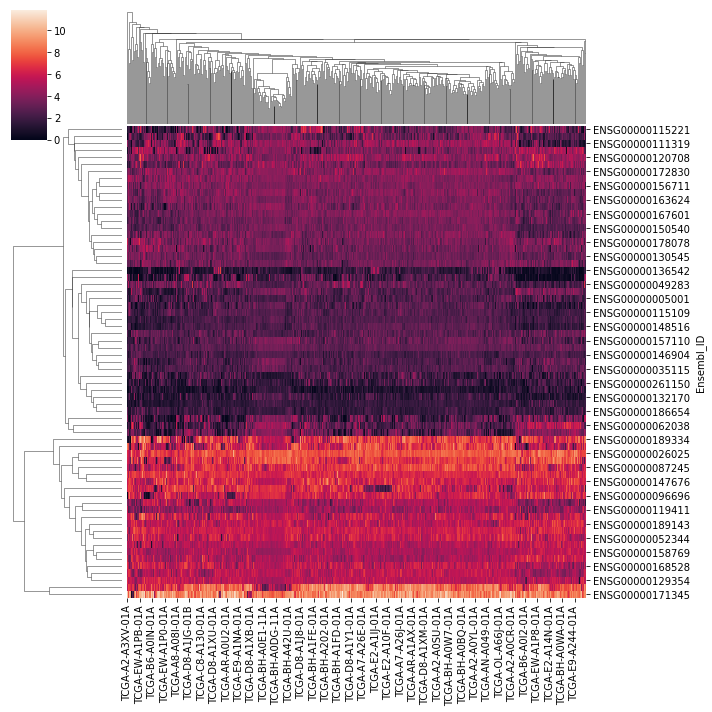

In [88]:

sns.clustermap(m)
plt.savefig('my_plot.png')

In [89]:
n=data[data.index.isin(lists)]
n

,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-B6-A0I9-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000167880,3.463772,3.309622,1.413959,4.121023,2.549234,2.250491,4.264678,3.194394,3.678820,3.174795,...,2.083027,2.537241,1.624375,2.941320,3.222550,3.173920,1.491679,2.766947,2.622119,2.341247
ENSG00000115221,1.837093,3.418019,4.541999,0.939198,3.741967,3.826151,0.586359,6.399921,5.832381,2.949424,...,4.525121,3.539874,1.649602,3.549761,3.246621,2.905780,3.339821,3.201033,4.588786,6.421303
ENSG00000130545,3.443428,2.943503,2.050025,4.320445,3.367729,3.200767,4.012597,3.785114,3.481388,3.151727,...,2.785465,3.408031,4.665052,3.622029,3.370246,3.816640,1.729336,3.378570,2.919372,2.621576
ENSG00000163297,2.112942,1.945282,3.752700,1.588490,1.261368,2.537359,1.165195,2.974904,2.836411,1.508563,...,2.547346,2.711970,2.414664,2.120629,1.838185,1.445622,3.653323,3.164278,2.841478,2.166435
ENSG00000158769,5.025390,5.209399,4.384437,5.882018,5.263605,4.576765,4.690445,5.102628,5.257718,5.485100,...,4.619206,4.525219,4.801798,5.124644,6.120093,5.394665,4.249666,4.828254,5.110197,4.988560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000184292,6.995523,6.110947,7.397387,4.630256,6.867418,6.964938,6.465959,7.567729,5.790817,6.567702,...,8.128811,6.190993,6.491100,6.935946,7.335459,7.692052,6.841275,6.112127,7.430924,5.803635
ENSG00000115339,2.236987,4.228957,4.016882,3.767530,3.882666,4.455683,2.463648,3.364982,4.246133,3.314917,...,4.143482,0.742699,3.627860,0.146485,5.057159,0.841787,2.642368,1.644821,3.814248,3.885633
ENSG00000182795,4.015112,3.317072,3.325593,0.613548,2.607682,2.462630,0.291928,2.279475,4.356952,0.939317,...,3.577164,1.785147,4.608602,1.501259,4.434881,0.490427,2.829639,3.559801,2.634762,2.405131


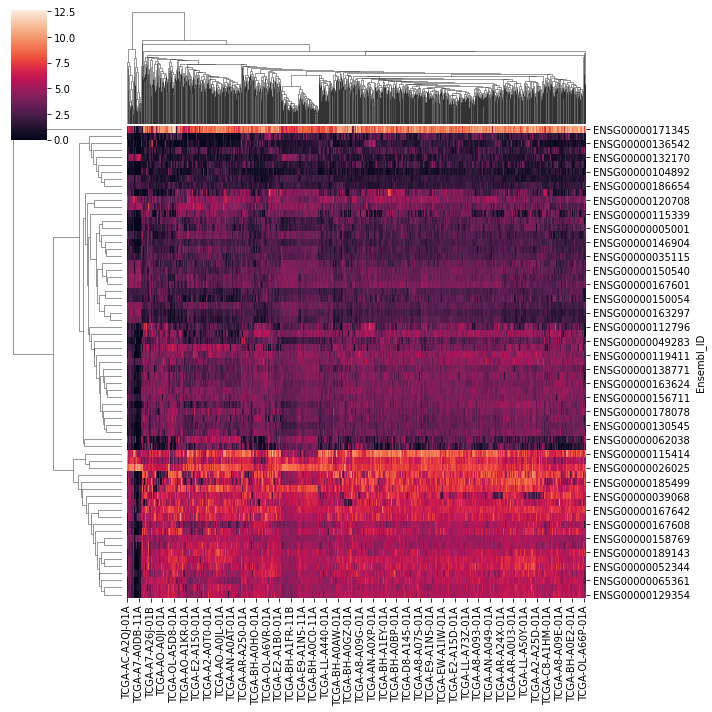

In [90]:
sns.clustermap(n)
plt.savefig('clustermap_67gs.png')